       playerID                 name  pos  height  weight
0     abdulka01  Kareem Abdul-Jabbar    C    85.0   225.0
1     abdulma02   Mahmoud Abdul-Rauf    G    73.0   162.0
2     abdulza01      Zaid Abdul-Aziz  C-F    81.0   230.0
3     adamsal01          Alvan Adams  C-F    81.0   210.0
4     adamsmi01        Michael Adams    G    70.0   162.0
...         ...                  ...  ...     ...     ...
1168  sokodpa01          Paul Sokody    F    74.0   170.0
1169  tayloro02         Roger Taylor    G    72.0   175.0
1170  vaughgo01       Govoner Vaughn  F-G    76.0   180.0
1171  witashe01       Herman Witasek  G-F    74.0   210.0
1172  devetru01      Russell DeVette    F    77.0   190.0

[1167 rows x 5 columns]


Index(['playerID', 'name', 'pos', 'height', 'weight', 'GP', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'note'

b'Skipping line 3289: expected 38 fields, saw 75\n'


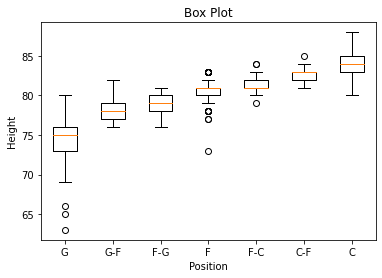

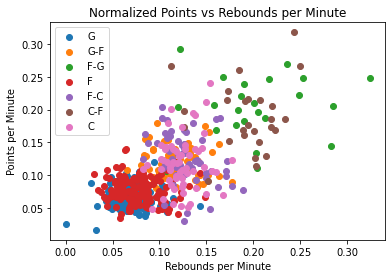

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


[[-0.2740128818340875 -0.2585958572917258 0.6976820233541433 'G']
 [-0.22418765782575195 -0.20480364777507223 1.386542373788176 'G']
 [-0.11198562533977578 -0.13430608410099612 0.19508186390188384 'F-G']
 ...
 [0.0803757854316906 0.0574383073192823 -0.8651388563518677 'G-F']
 [0.006323326961665227 0.01513150909126084 -0.10249200855337444 'G-F']
 [-0.007434888066452967 -0.025033172770784862 -0.3426837323406429 'G-F']]


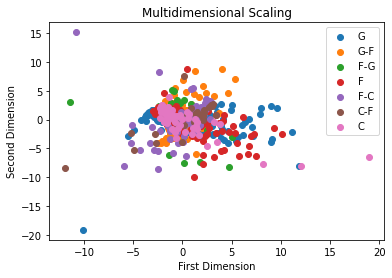

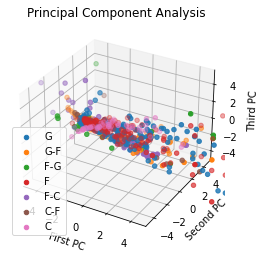

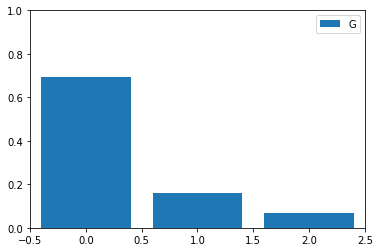

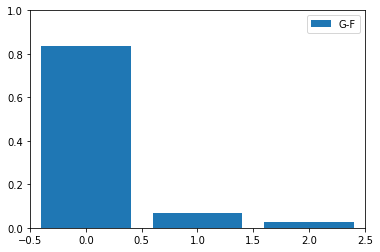

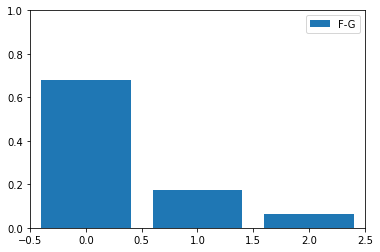

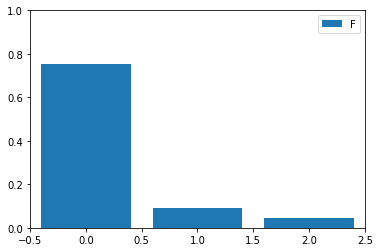

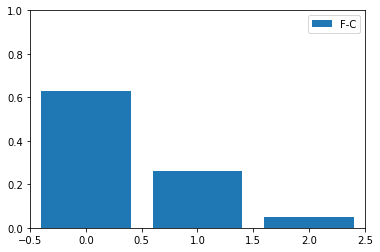

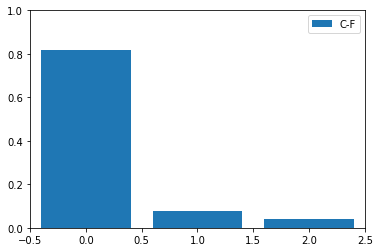

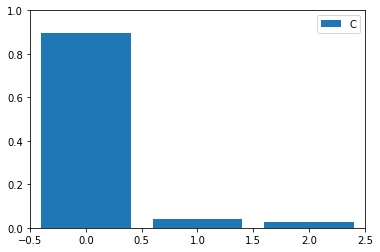

In [12]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn import preprocessing;
from sklearn.manifold import MDS;
from sklearn.decomposition import PCA;
import scipy;
import random;



# Current, notes, strip pandas data frame into arrays then then process using MDS








# Problem 1

# Import player data
player_data = pd.read_csv("bballPlayers.txt")

# Initialize acceptable position array
player_pos = ["G", "G-F", "F-G", "F", "F-C", "C-F", "C"]

# Check if any element has a position which is also in our position array
comparator = list(map(lambda position: position in player_pos, player_data["pos"]))

# Categorical Array
num_of_categories = pd.Categorical(player_data['pos'])

# Clean up data
cleaned_playerPos = player_data[comparator]
print(cleaned_playerPos)
print('\n')

# Problem 2

# Import Stats data
stats_data = pd.read_csv("bballStats.txt", error_bad_lines=False)
drop_array=[]

# Remove Post Season Playoff Stats
for col in stats_data.columns:
    if "Post" in col:
        drop_array.append(col)
    
no_post_stats = stats_data.drop(drop_array, axis=1)

# Group, sum and merge
no_post_stats = no_post_stats.groupby("playerID").sum()

# Join table 1 and 2
merged_playerData = cleaned_playerPos.merge(no_post_stats, on = 'playerID')

print(merged_playerData.columns)
# Problem 3

# Graph height in box plot vs position
boxplot_array =[]

for cat in player_pos:
    temp = merged_playerData["pos"] == cat
    boxplot_array.append(merged_playerData[temp]['height'].values) 
    

plt.boxplot(boxplot_array, labels = player_pos)
plt.title('Box Plot')
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

# Scatter plot normalized points per minute vs reb perminute by position

for cat in player_pos:
    temp = merged_playerData["pos"] == cat
    focused_data = merged_playerData[temp]
    tempy = preprocessing.normalize((focused_data['points'].values/focused_data['minutes'].values).reshape(1, -1))
    tempx = preprocessing.normalize((focused_data['rebounds'].values/focused_data['minutes'].values).reshape(1, -1))
    plt.scatter(tempx,tempy, label = cat)
    
plt.title("Normalized Points vs Rebounds per Minute")
plt.xlabel("Rebounds per Minute")
plt.ylabel("Points per Minute")
plt.legend()
plt.show()

# Normalize the following data so that it has zero mean and unit variance

normalized_Data = merged_playerData[['pos','height', 'weight', 'minutes', 'points', 'oRebounds', 'dRebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade']]
# print('\nPre\n{}\n'.format(normalized_Data))

temp = ((merged_playerData[['weight', 'height', 'minutes']].div(merged_playerData['GP'], axis=0)))
normalized_Data.update(temp)


normalized_Data = (normalized_Data - normalized_Data.mean())/(normalized_Data.std())
normalized_Data['pos'] = merged_playerData['pos']
# print('\nPost\n{}\n'.format(normalized_Data))

p_array = normalized_Data[['weight', 'height', 'minutes','pos']]
# p_array = np.array([[p_array['weight'].values]])
# p_array = [normalized_Data['height'].values, normalized_Data['weight'], normalized_Data], 
# First 3 dims by position
# print(normalized_Data)

print(p_array.values)

# Run MDS on the data
fig = plt.figure()
ax = fig.add_subplot(111)
for cat in player_pos:
    temp = normalized_Data["pos"] == cat
    focused_data = normalized_Data[temp].drop('pos', axis=1)
    emb = MDS(n_components=2)
    
    fitted_x = emb.fit_transform(focused_data.values)
#     colorize = dict(c=fitted_x[:, 0], cmap=plt.cm.get_cmap('rainbow', 3))
    
    ax.scatter(fitted_x[:,0],fitted_x[:,1], label = cat)


plt.axis([-5, 5, -5, 5])
plt.legend()
ax.set_xlabel("First Dimension")
ax.set_ylabel("Second Dimension")
# ax.set_zlabel("Third Dimension")
plt.title("Multidimensional Scaling")
          
plt.show()  
emb_ar = []

# Run PCA on Data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cat in player_pos:
    temp = normalized_Data["pos"] == cat
    focused_data = normalized_Data[temp].drop('pos', axis=1)
    emb = PCA(n_components=3)
    emb_ar.append([emb,cat])
    fitted_x = emb.fit_transform(focused_data.values)
#     colorize = dict(c=fitted_x[:, 0], cmap=plt.cm.get_cmap('rainbow', 3))
    
    ax.scatter(fitted_x[:,0],fitted_x[:,1],fitted_x[:,2], label = cat)


plt.axis([-5, 5, -5, 5])
plt.legend()
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
ax.set_zlabel("Third PC")
plt.title("Principal Component Analysis")
plt.show() 

for emb in emb_ar:
    plt.bar(range(len(emb[0].explained_variance_ratio_)),emb[0].explained_variance_ratio_, label = emb[1])
    plt.legend()
    plt.axis([-.5, 2.5, 0, 1])
    plt.show()